<a href="https://colab.research.google.com/github/Saisha0512/Portfolio_Optimization_ML_DL/blob/main/Portfolio_Optimization_using_ML_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Portfolio Optimization using ML & DL**

# **Project Contributors**

6 - week Summer Internship on Python & Machine Learning
> **Saisha Verma (18101012024, B. Tech, CSE - 3, 2nd Year)**

> **Ritisha Sood (17201012024, B.Tech, CSE - 3, 2nd Year)**

# **Objective**

The objective of this project is to build **a machine learning and deep learning-based portfolio optimization system** that dynamically suggests optimal asset allocations based on historical data, aiming to maximize returns while minimizing risk.

#**Problem Statement**

Traditional investment strategies rely on fixed rules that may not adapt well to changing market conditions. This project addresses the question : ***“Can we use deep learning and machine learning to create smarter, adaptive portfolio strategies that improve returns while managing volatility?”***

#**Importing the Libraries**

In [ ]:
# Installing yfinance
!pip install yfinance

In [ ]:
# Importing the libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Ignoring warnings :
import warnings
warnings.filterwarnings("ignore")

#**Data Collection**

**Fetching data from the yfinance library**

In [ ]:
# Assigning companies to tickers & date range :
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']
start_date = '2012-01-03'
end_date = '2021-12-31'

# Fetching the data from the yfinance library :
df = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

all_data = []
for ticker in tickers:
    temp_df = df[ticker].copy()
    temp_df['Company'] = ticker
    temp_df.reset_index(inplace=True)
    all_data.append(temp_df)

stock_data = pd.concat(all_data)
stock_data = stock_data[['Date', 'Company', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Ensuring correct ordering :
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.dropna(subset=['Open','High','Low','Close','Volume'], inplace=True)
stock_data.sort_values(["Company", "Date"], inplace=True)
stock_data.reset_index(drop=True, inplace=True)

# Saving the raw data :
stock_data.to_csv("stocks_data.csv", index=False)

[*********************100%***********************]  4 of 4 completed


In [ ]:
stock_data

Price,Date,Company,Open,High,Low,Close,Volume
0,2012-01-03,AAPL,12.290237,12.383299,12.278228,12.345173,302220800
1,2012-01-04,AAPL,12.308246,12.448741,12.286632,12.411515,260022000
2,2012-01-05,AAPL,12.456848,12.564920,12.388401,12.549310,271269600
3,2012-01-06,AAPL,12.601541,12.691000,12.585030,12.680493,318292800
4,2012-01-09,AAPL,12.773563,12.841108,12.648979,12.660387,394024400
...,...,...,...,...,...,...,...
10059,2021-12-23,MSFT,323.096079,326.630488,323.076670,324.979797,19617800
10060,2021-12-27,MSFT,325.727396,332.543746,325.698268,332.514618,19947000
10061,2021-12-28,MSFT,333.194358,333.835213,330.446476,331.349487,15661500
10062,2021-12-29,MSFT,331.398040,334.311002,329.825045,332.029205,15042000


In [ ]:
# Displaying AAPL data :
stock_data[stock_data['Company'] == 'AAPL']

Price,Date,Company,Open,High,Low,Close,Volume
0,2012-01-03,AAPL,12.290237,12.383299,12.278228,12.345173,302220800
1,2012-01-04,AAPL,12.308246,12.448741,12.286632,12.411515,260022000
2,2012-01-05,AAPL,12.456848,12.564920,12.388401,12.549310,271269600
3,2012-01-06,AAPL,12.601541,12.691000,12.585030,12.680493,318292800
4,2012-01-09,AAPL,12.773563,12.841108,12.648979,12.660387,394024400
...,...,...,...,...,...,...,...
2511,2021-12-23,AAPL,172.403858,173.384261,171.835223,172.825424,68356600
2512,2021-12-27,AAPL,173.619555,176.884299,173.599958,176.796066,74919600
2513,2021-12-28,AAPL,176.629374,177.776443,175.031312,175.776413,79144300
2514,2021-12-29,AAPL,175.815647,177.090173,174.648965,175.864670,62348900


In [ ]:
# Displaying MSFT data :
stock_data[stock_data['Company'] == 'MSFT']

Price,Date,Company,Open,High,Low,Close,Volume
7548,2012-01-03,MSFT,20.866301,21.188530,20.740553,21.039206,64731500
7549,2012-01-04,MSFT,21.078500,21.589351,21.047064,21.534336,80516100
7550,2012-01-05,MSFT,21.518620,21.793694,21.447888,21.754398,56081400
7551,2012-01-06,MSFT,21.636514,22.155224,21.636514,22.092350,99455500
7552,2012-01-09,MSFT,22.045184,22.084481,21.785829,21.801548,59706800
...,...,...,...,...,...,...,...
10059,2021-12-23,MSFT,323.096079,326.630488,323.076670,324.979797,19617800
10060,2021-12-27,MSFT,325.727396,332.543746,325.698268,332.514618,19947000
10061,2021-12-28,MSFT,333.194358,333.835213,330.446476,331.349487,15661500
10062,2021-12-29,MSFT,331.398040,334.311002,329.825045,332.029205,15042000


In [ ]:
# Displaying AMZN data :
stock_data[stock_data['Company'] == 'AMZN']

Price,Date,Company,Open,High,Low,Close,Volume
2516,2012-01-03,AMZN,8.794500,8.974000,8.777500,8.951500,102216000
2517,2012-01-04,AMZN,8.960500,9.025000,8.803500,8.875500,84104000
2518,2012-01-05,AMZN,8.797000,8.912500,8.702500,8.880500,76182000
2519,2012-01-06,AMZN,8.903500,9.232500,8.875000,9.130500,140168000
2520,2012-01-09,AMZN,9.138000,9.218500,8.850000,8.928000,101138000
...,...,...,...,...,...,...,...
5027,2021-12-23,AMZN,170.427994,171.975006,170.149994,171.068497,36788000
5028,2021-12-27,AMZN,171.037003,172.942993,169.215500,169.669495,58688000
5029,2021-12-28,AMZN,170.182495,172.175995,169.135498,170.660995,54638000
5030,2021-12-29,AMZN,170.839996,171.212006,168.600494,169.201004,35754000


In [ ]:
# Displaying GOOGL data :
stock_data[stock_data['Company'] == 'GOOGL']

Price,Date,Company,Open,High,Low,Close,Volume
5032,2012-01-03,GOOGL,16.242430,16.620792,16.228252,16.552631,146912940
5033,2012-01-04,GOOGL,16.543177,16.673031,16.433476,16.624025,114445440
5034,2012-01-05,GOOGL,16.471039,16.516810,16.324271,16.393425,131184684
5035,2012-01-06,GOOGL,16.396906,16.418051,16.164068,16.169790,107608284
5036,2012-01-09,GOOGL,16.082228,16.094666,15.453616,15.484213,232671096
...,...,...,...,...,...,...,...
7543,2021-12-23,GOOGL,145.626644,147.359750,145.578926,146.040665,26384000
7544,2021-12-27,GOOGL,146.378130,147.459642,146.292144,147.024750,15976000
7545,2021-12-28,GOOGL,147.352277,147.414905,145.183794,145.812515,18200000
7546,2021-12-29,GOOGL,145.770250,146.538151,144.779200,145.780685,17788000


#**Data Visualization**

**Plotting the training & testing data**

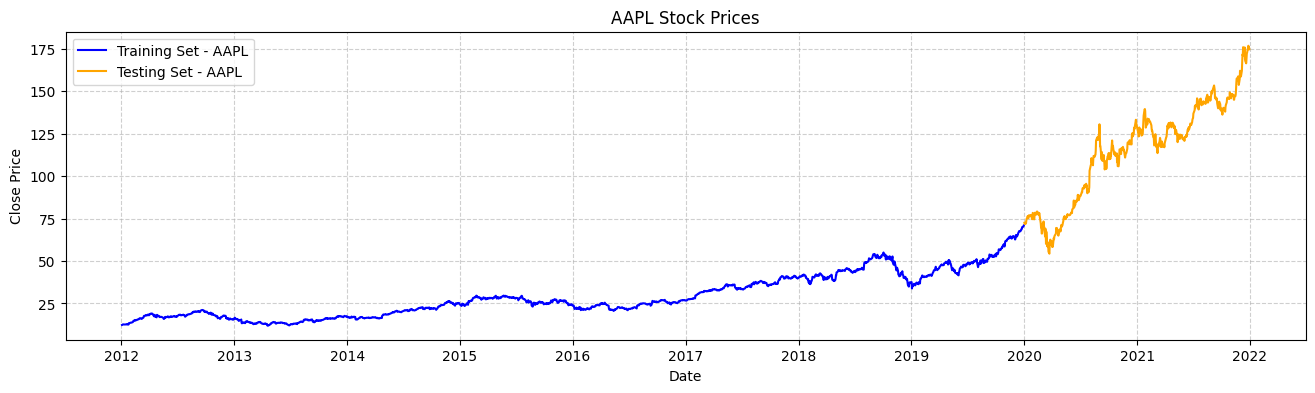

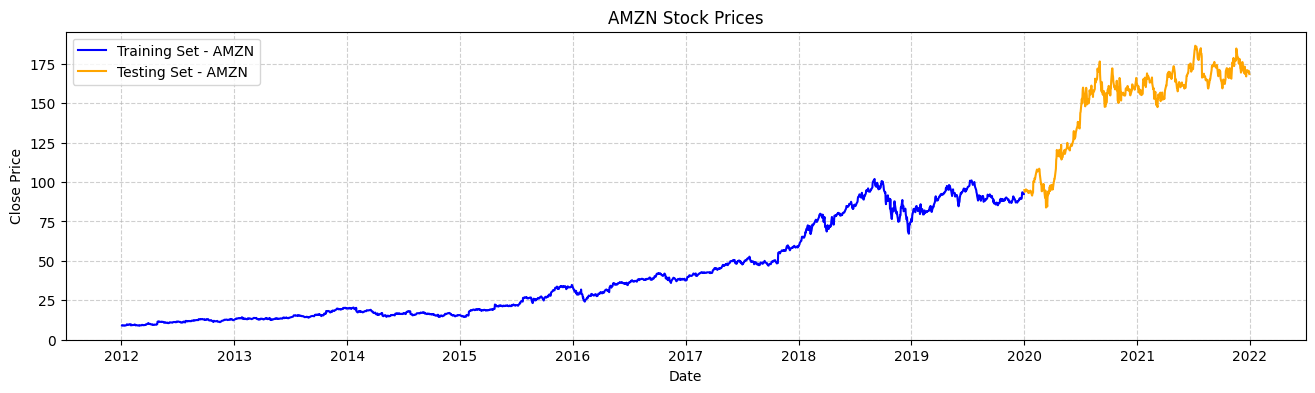

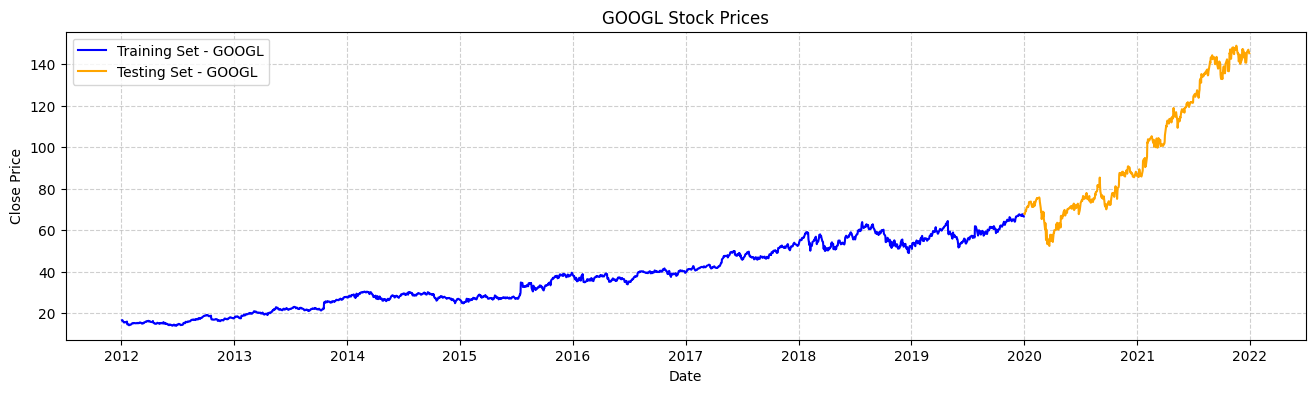

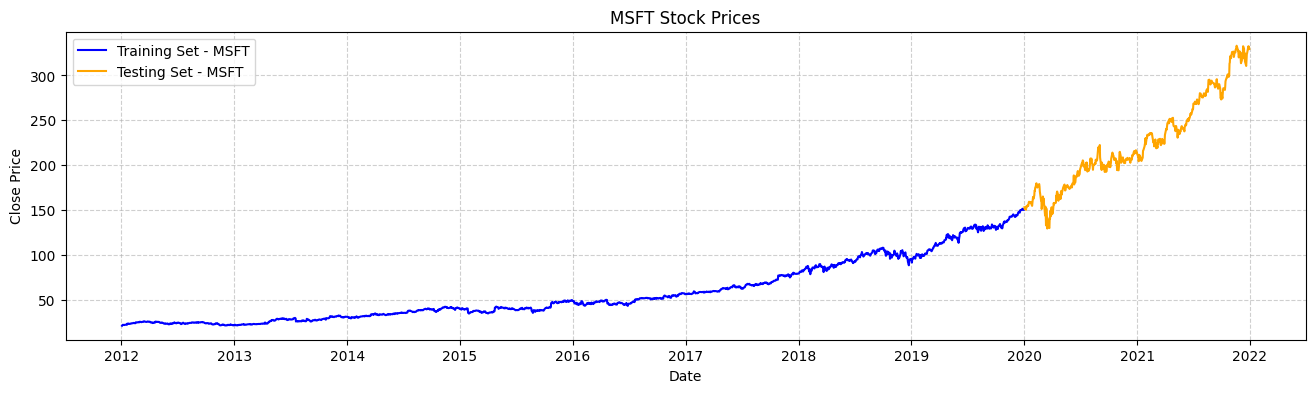

In [ ]:
# The list of companies :
companies = stock_data['Company'].unique()

# Iterating through the data for each company :
for company in companies:
    company_data = stock_data[stock_data['Company'] == company].sort_values(by="Date")

    plt.figure(figsize=(16,4))

    # Plotting training set (80%) :
    train_end = int(0.8 * len(company_data))
    plt.plot(company_data['Date'].iloc[:train_end],
             company_data['Close'].iloc[:train_end],
             label=f'Training Set - {company}', color='blue')

    # Plot testing set (20%) :
    plt.plot(company_data['Date'].iloc[train_end:],
             company_data['Close'].iloc[train_end:],
             label=f'Testing Set - {company}', color='orange')

    plt.title(f'{company} Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

#**Implementing the LSTM Model**

**Importing the required libraries**

*EXPLANATION :*
* NumPy & Pandas : Handle data and numbers easily
* os : Create folders and manage files
* joblib : Save & Load Python objects like scalers
* math.sqrt : Find square roots (used in RMSE calculation)
* sklearn tools : Scale values & measure errors
* Keras/TensorFlow : Build, train & save the LSTM model
* plot_model : Make a picture of the neural network structure




In [ ]:
import os
import joblib
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l1_l2

**Creating parameters, folders & empty dataframes to store the outputs**

*EXPLANATION :*

> **Parameters (Control how the model learns)**
*  TIME_STEPS : Past days data we used to predict the next day
*  BATCH_SIZE : Samples we feed to the model at once during training
*  EPOCHS : No. of times the model sees the training data
*  LR_INIT : Starting learning rate (training speed)
*  DROPOUT : Percentage of neurons turned off temporarily to avoid overfitting
*  L1_REG & L2_REG : Small penalties on large weights to keep model stable

> **os.makedirs** creates folders for storing outputs.

> **metrics_summary** is an empty dictionary to store the evaluation metrics of the model for each company.

In [ ]:
# Parameters :
TIME_STEPS = 60
BATCH_SIZE = 64
EPOCHS = 150
LR_INIT = 0.0005
DROPOUT = 0.3
L1_REG, L2_REG = 1e-5, 1e-4

# Creating folders to store outputs :
os.makedirs("models", exist_ok=True) # to store trained models
os.makedirs("history", exist_ok=True) # to store trained history/logs
os.makedirs("architecture", exist_ok=True) # to store model architectures
os.makedirs("metrics", exist_ok=True) # to store the evaluation metrics for each company
os.makedirs("scalers", exist_ok=True) # to store the scaling objects

# Creating an empty dictionary to store metrics of the model for each company :
metrics_summary = {
    'Company': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'MAPE': []
}

**Helper Functions**

*EXPLANATION :*

> **create_sequences :** It turns raw daily data into "sliding windows" of past TIME_STEPS days to predict the next day, as LSTM requires sequential data.

> **lr_scheduler :** It slowly lowers learning rate each epoch & helps the model learn faster at first and fine-tune later.

> **jitter :** It adds small random noise to data to makes model more robust, so it doesn’t memorize data exactly.

In [ ]:
# Create Sequnces Function :
def create_sequences(X, y, time_steps=TIME_STEPS):
    X_seq, y_seq = [], []
    for i in range(time_steps, len(X)):
        X_seq.append(X[i-time_steps:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

# LR Scheduler Function :
def lr_scheduler(epoch, lr):
    return lr * 0.90

# Jitter Function :
def jitter(data, noise_factor=0.02):
    noise = np.random.normal(loc=0, scale=noise_factor, size=data.shape)
    return data + noise

**Training the LSTM Model per Company**

*EXPLANATION :*

Running the whole process separately for each company's stock using for loop, as each company has different stock patterns so separate models work better.

> **Data Preparation**
* Extracting the raw values from the previously stored data
* Splitting the data into X (faetures) & y (target) variables
* Scaling features and target values in 0–1 range.
* Saving the scalers for future forecasting purpose.
* Converting data into sequential ordering for LSTM Model input.

> **Train - Test Split :** Spliting into training, testing & validation sets.

> **Model Architecture :** Building the LSTM-based network with :
* Two LSTM layers to learn patterns in sequences.
* Dropout layers to prevent overfitting.
* Dense layer to output the prediction.

> **Training the LSTM Model**
* Using callbacks for early stopping and learning rate scheduling.
* Training the model with training and validation data.

> **Prediction & Metrics**
* Making predictions on the test data.
* Converting predictions back to original price scale.
* Calculating MSE, RMSE, MAE & MAPE for performance evaluation measurement.

> **Saving Model & Results :** Saving model diagram, trained model, training history & performance metrics in the parameters created earlier.

In [ ]:
# Training the LSTM Model per company :
companies = stock_data['Company'].unique()

for company in companies:
    print(f"\n TRAINING LSTM FOR {company}...")

    # Extracting raw values from the data :
    company_df = stock_data[stock_data['Company'] == company].sort_values('Date')
    X_raw = company_df[['Open', 'High', 'Low', 'Volume']].values.astype(float)
    y_raw = company_df[['Close']].values.astype(float)

    # Scaling the features & target of the data :
    feature_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()
    X_scaled = feature_scaler.fit_transform(X_raw)
    y_scaled = target_scaler.fit_transform(y_raw)

    # Saving the scalers for forecating the predictions later on :
    joblib.dump(feature_scaler, f"scalers/{company}_feature_scaler.pkl")
    joblib.dump(target_scaler, f"scalers/{company}_target_scaler.pkl")

    # Data Augmentation using jitter :
    X_scaled = jitter(X_scaled, noise_factor=0.01)
    X_scaled = feature_scaler.transform(X_scaled)

    # Creating Sequences :
    X_seq, y_seq = create_sequences(X_scaled, y_scaled)

    # Splitting the train (80 %) & test (20 %) data in Chronological Order of Dates :
    split_idx = int(len(X_seq) * 0.8)
    X_train, y_train = X_seq[:split_idx], y_seq[:split_idx]
    X_test, y_test = X_seq[split_idx:], y_seq[split_idx:]

    # Cross - Validation Splitting :
    val_split_idx = int(len(X_train) * 0.9)
    X_val, y_val = X_train[val_split_idx:], y_train[val_split_idx:]
    X_train, y_train = X_train[:val_split_idx], y_train[:val_split_idx]

    # Implementing the LSTM Model Architecture :
    model = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),
        LSTM(128, return_sequences=True,
             kernel_regularizer=l1_l2(l1=L1_REG, l2=L2_REG),
             bias_regularizer=l1_l2(l1=L1_REG, l2=L2_REG)),
        Dropout(DROPOUT),
        LSTM(64, return_sequences=False,
             kernel_regularizer=l1_l2(l1=L1_REG, l2=L2_REG),
             bias_regularizer=l1_l2(l1=L1_REG, l2=L2_REG)),
        Dropout(DROPOUT),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=LR_INIT), loss='mse') # Compling the model

    # Training the Model :
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        LearningRateScheduler(lr_scheduler)
    ]

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks,
        verbose=1
    )
    np.save(f"history/{company}_history.npy", history.history)  # Saving the historical/logs data

    # Making Predictions :
    y_pred_scaled = model.predict(X_test)
    y_test_inv = target_scaler.inverse_transform(y_test)
    y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

    # Evaluation Metrics :
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

    # Storing the metrics in the dictionary initialized in starting :
    metrics_summary['Company'].append(company)
    metrics_summary['MSE'].append(mse)
    metrics_summary['RMSE'].append(rmse)
    metrics_summary['MAE'].append(mae)
    metrics_summary['MAPE'].append(mape)

    # Visualizing and Saving the Model Architecture :
    plot_file = f"architecture/{company}_model_architecture.png"
    plot_model(
        model,
        to_file=plot_file,
        show_shapes=True,
        show_layer_names=True,
        dpi=96
        )

    # Saving the model :
    model.save(f"models/LSTM_{company}.keras")
    print(f"MODEL SAVED : models/LSTM_{company}.keras")


 TRAINING LSTM FOR AAPL...
Epoch 1/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - loss: 0.0650 - val_loss: 0.0832 - learning_rate: 4.5000e-04
Epoch 2/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step - loss: 0.0552 - val_loss: 0.0773 - learning_rate: 4.0500e-04
Epoch 3/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 0.0493 - val_loss: 0.0724 - learning_rate: 3.6450e-04
Epoch 4/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - loss: 0.0447 - val_loss: 0.0697 - learning_rate: 3.2805e-04
Epoch 5/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - loss: 0.0410 - val_loss: 0.0654 - learning_rate: 2.9525e-04
Epoch 6/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - loss: 0.0382 - val_loss: 0.0649 - learning_rate: 2.6572e-04
Epoch 7/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - loss: 0.0360 - val_loss: 0.0608 - learning_rate: 2.3915e-04
Epoch 8/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - loss: 0.0341 - val_loss: 0.0611 - learning_rate: 2.1523e-04
Epoch 9/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step

**Saving the Evaluation Metrics as a CSV File**

In [ ]:
# Saving the metrics as a CSV File after converting it into a DataFrame :
metrics_df = pd.DataFrame(metrics_summary)
metrics_df.to_csv(f"metrics/train_metrics.csv", index=False)
metrics_df

,Company,MSE,RMSE,MAE,MAPE
0,AAPL,8790.176458,93.755941,89.271837,75.121152
1,AMZN,14117.487114,118.817032,116.196214,75.644764
2,GOOGL,4930.548020,70.217861,64.030938,61.517330
3,MSFT,33823.198098,183.910843,176.941622,76.698663


**Model Summary**

In [ ]:
# Displaying the Model Summary for the trained models of each company :
from tensorflow.keras.models import load_model
import os

companies = stock_data['Company'].unique()
for company in companies:
    print(f"\n MODEL SUMMARY FOR {company}:")
    model_path = f"models/LSTM_{company}.keras"  # Fetching the stored model

    if os.path.exists(model_path):
        loaded_model = load_model(model_path, compile=False) # Loading the saved model
        loaded_model.summary() # Printing the model summary
    else:
        print(f"MODEL FILE NOT FOUND : {model_path}")


 MODEL SUMMARY FOR AAPL:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 60, 128)        │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,569 (459.25 KB)

 Trainable params: 117,569 (459.25 KB)

 Non-trainable params: 0 (0.00 B)


 MODEL SUMMARY FOR AMZN:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 60, 128)        │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,569 (459.25 KB)

 Trainable params: 117,569 (459.25 KB)

 Non-trainable params: 0 (0.00 B)


 MODEL SUMMARY FOR GOOGL:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 60, 128)        │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,569 (459.25 KB)

 Trainable params: 117,569 (459.25 KB)

 Non-trainable params: 0 (0.00 B)


 MODEL SUMMARY FOR MSFT:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 60, 128)        │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,569 (459.25 KB)

 Trainable params: 117,569 (459.25 KB)

 Non-trainable params: 0 (0.00 B)

**Model Architecture**


 MODEL ARCHITECTURE FOR AAPL:


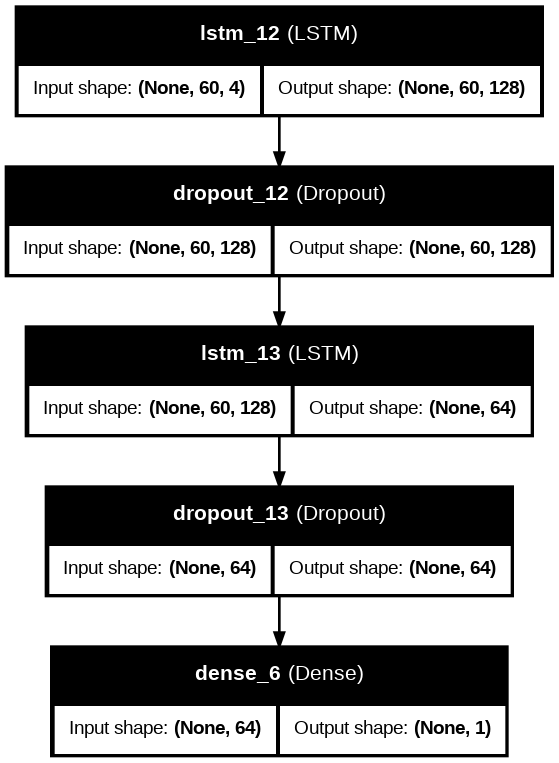


 MODEL ARCHITECTURE FOR AMZN:


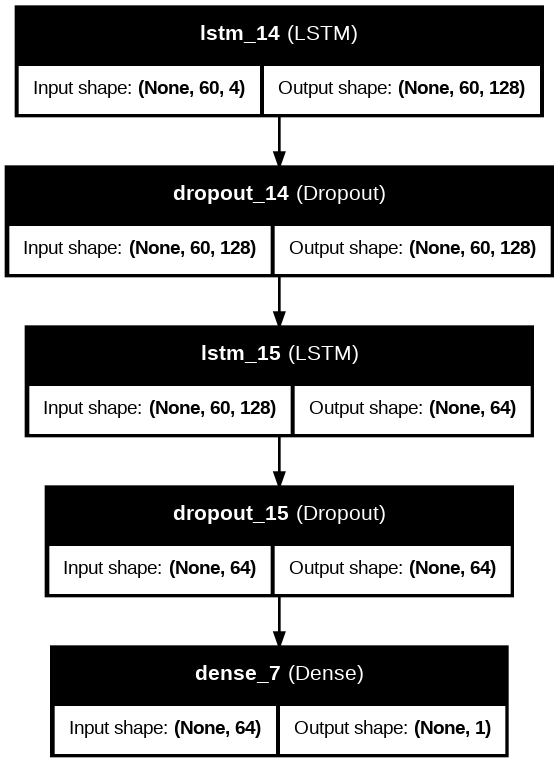


 MODEL ARCHITECTURE FOR GOOGL:


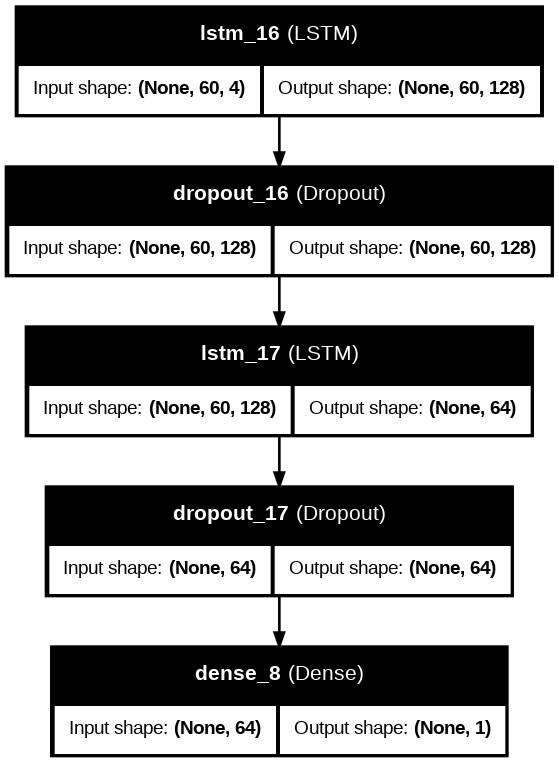


 MODEL ARCHITECTURE FOR MSFT:


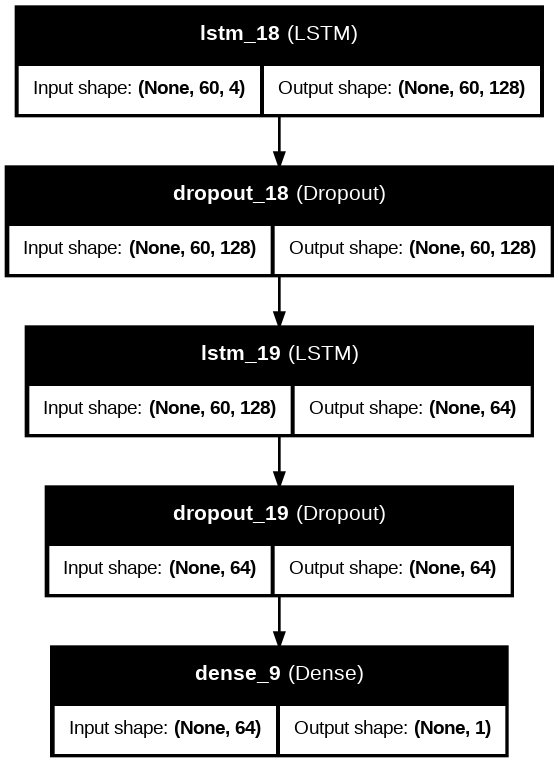

In [ ]:
# Displaying the Model Architecture saved earlier in the ONG Format :
from IPython.display import Image, display
import os

for company in companies:
    print(f"\n MODEL ARCHITECTURE FOR {company}:")
    img_path = f"architecture/{company}_model_architecture.png"  # Fetching the stored PNG File

    if os.path.exists(img_path):
        display(Image(filename=img_path)) # Displaying the PNG File
    else:
        print(f"ARCHITECTURE IMAGE NOTE FOUND : {img_path}")

**Plotting the Actual vs Predicted Stock Prices for each Company**


 VISUALIZATION FOR AAPL:
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step


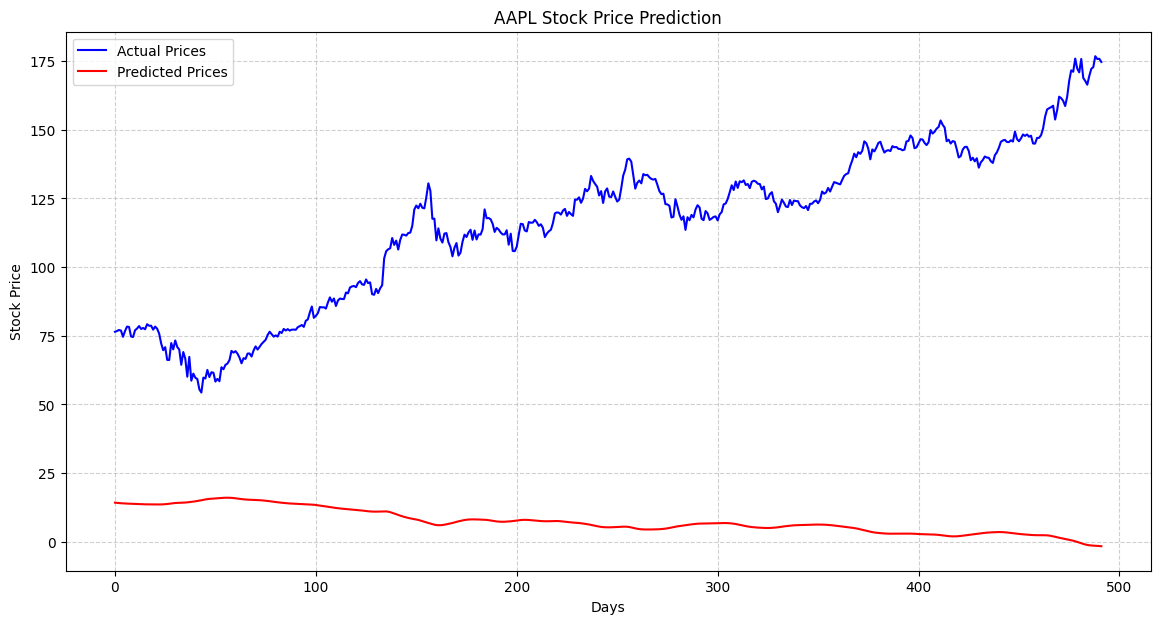


 VISUALIZATION FOR AMZN:
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


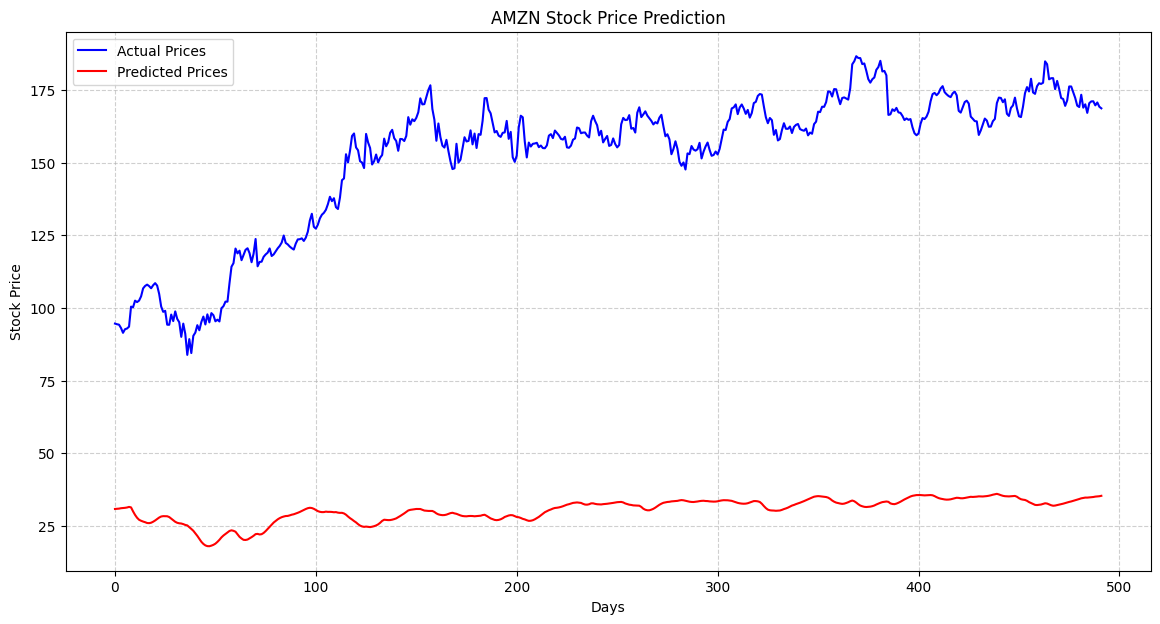


 VISUALIZATION FOR GOOGL:
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


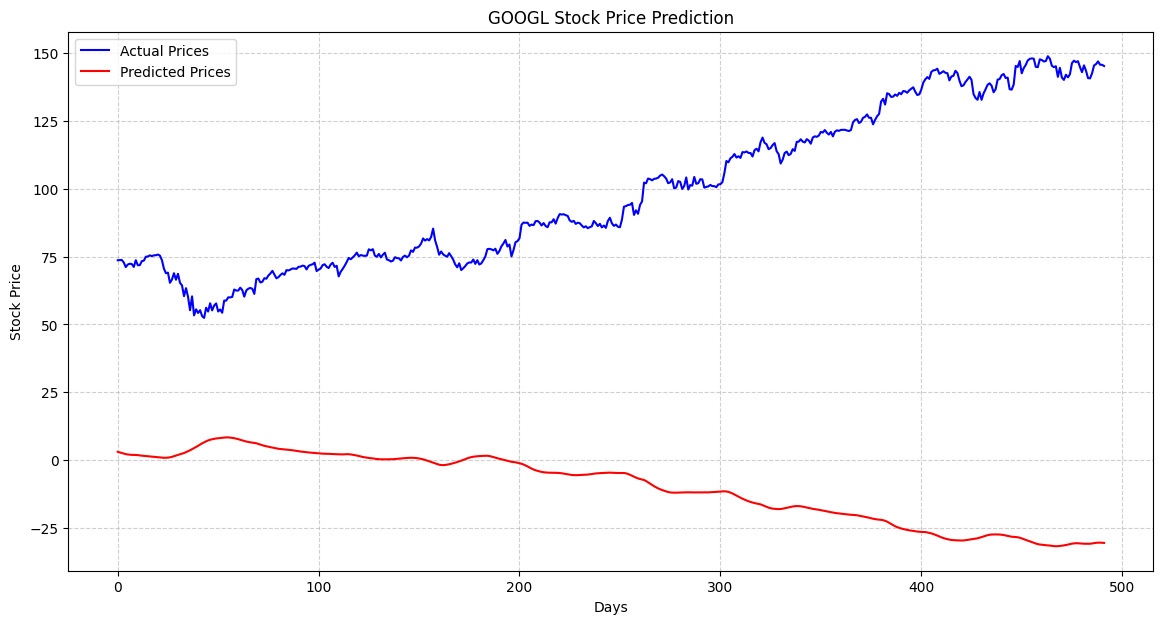


 VISUALIZATION FOR MSFT:
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


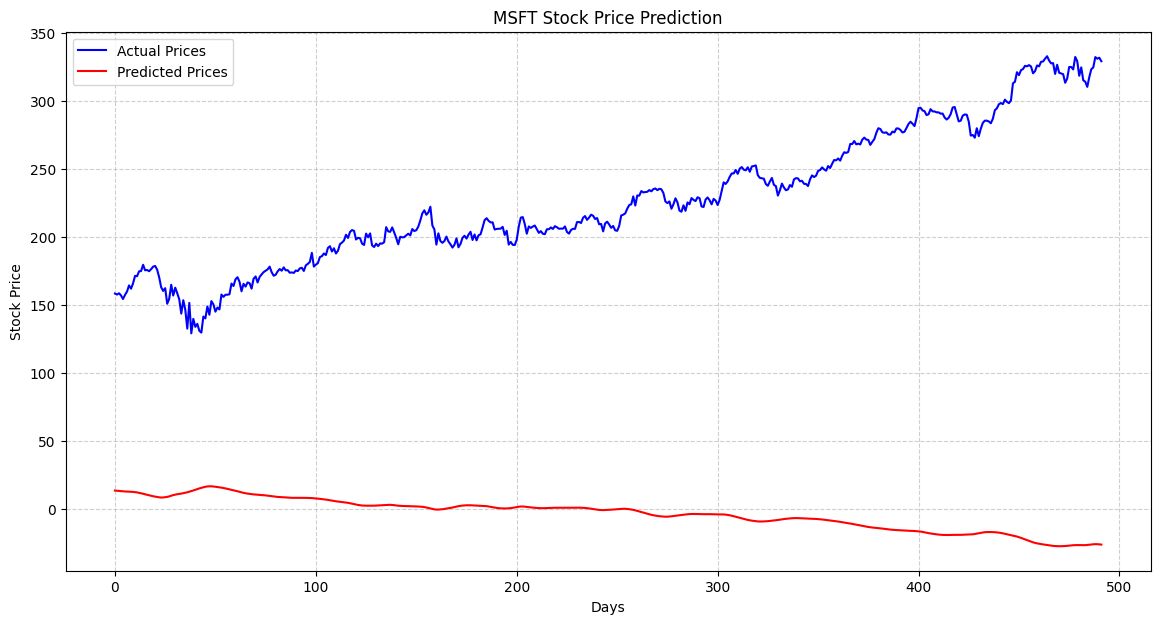

In [ ]:
import joblib, os
from tensorflow.keras.models import load_model

# Parameters :
TIME_STEPS = 60

# Helper Functions (As used earlier during training the model) :
def create_sequences(X, y, time_steps=TIME_STEPS):
    X_seq, y_seq = [], []
    for i in range(time_steps, len(X)):
        X_seq.append(X[i-time_steps:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

for company in companies:
    print(f"\n VISUALIZATION FOR {company}:")

    # Loading the data :
    company_df = stock_data[stock_data['Company'] == company].sort_values('Date')
    X_raw = company_df[['Open', 'High', 'Low', 'Volume']].values.astype(float)
    y_raw = company_df[['Close']].values.astype(float)

    # Loading the scalers saved earlier :
    target_scaler = joblib.load(f"scalers/{company}_target_scaler.pkl")
    feature_scaler = joblib.load(f"scalers/{company}_feature_scaler.pkl")

    # Scaling the features & targets :
    X_scaled = feature_scaler.transform(X_raw)
    y_scaled = target_scaler.transform(y_raw)

    # Creating sequences :
    X_seq, y_seq = create_sequences(X_scaled, y_scaled)

    # Test split (same as before : last 20% is used for testing)
    split_idx = int(len(X_seq) * 0.8)
    X_test, y_test = X_seq[split_idx:], y_seq[split_idx:]

    # Loading model :
    model = load_model(f"models/LSTM_{company}.keras", compile=False)

    # Making predictions :
    predictions = model.predict(X_test)
    predictions_inverse = target_scaler.inverse_transform(predictions)
    y_test_inverse = target_scaler.inverse_transform(y_test)

    # Plotting Actual vs Predicted Stock Prices Graph :
    plt.figure(figsize=(14, 7))
    plt.plot(y_test_inverse, label='Actual Prices', color='blue')
    plt.plot(predictions_inverse, label='Predicted Prices', color='red')
    plt.title(f"{company} Stock Price Prediction")
    plt.xlabel("Days")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

**Evaluation Metrics of Trained Data**

In [ ]:
# Loading the saved metrics file :
metrics_df = pd.read_csv("metrics/train_metrics.csv")

# Printing metrics for each company
for _, row in metrics_df.iterrows():
    print(f"\n PERFORMANCE METRICS FOR {row['Company']}:\n")
    print(f"MAPE : {row['MAPE']:.4f}")
    print(f"MSE  : {row['MSE']:.4f}")
    print(f"MAE  : {row['MAE']:.4f}")
    print(f"RMSE : {row['RMSE']:.4f}")
    print("-" * 40)


 PERFORMANCE METRICS FOR AAPL:

MAPE : 75.1212
MSE  : 8790.1765
MAE  : 89.2718
RMSE : 93.7559
----------------------------------------

 PERFORMANCE METRICS FOR AMZN:

MAPE : 75.6448
MSE  : 14117.4871
MAE  : 116.1962
RMSE : 118.8170
----------------------------------------

 PERFORMANCE METRICS FOR GOOGL:

MAPE : 61.5173
MSE  : 4930.5480
MAE  : 64.0309
RMSE : 70.2179
----------------------------------------

 PERFORMANCE METRICS FOR MSFT:

MAPE : 76.6987
MSE  : 33823.1981
MAE  : 176.9416
RMSE : 183.9108
----------------------------------------


# **Forecasting Predictions**

In [ ]:
# Importing the required libraries :
import joblib
from tensorflow.keras.models import load_model

**Creating an empty data file to store the dates & company names of which predictions are to be made**

In [ ]:
companies = stock_data['Company'].unique()
# Generating trading days for 2022 via yfinance to make predictions :
trading_days = yf.download("AAPL", start="2022-01-01", end="2023-01-01").index

# Creating forecast_data DataFrame to store the Company Names & Dates :
forecast_data = pd.DataFrame({
    "Date": list(trading_days) * len(companies),
    "Company": [comp for comp in companies for _ in range(len(trading_days))]
})

# Saving it to a CSV File :
forecast_data.to_csv("forecast_data.csv", index=False)

print(f"forecast_data.csv CREATED WITH {len(forecast_data)} ROWS")

[*********************100%***********************]  1 of 1 completed

forecast_data.csv CREATED WITH 1004 ROWS


In [ ]:
# Displaying the forecast_data :
forecast_data

,Date,Company
0,2022-01-03,AAPL
1,2022-01-04,AAPL
2,2022-01-05,AAPL
3,2022-01-06,AAPL
4,2022-01-07,AAPL
...,...,...
999,2022-12-23,MSFT
1000,2022-12-27,MSFT
1001,2022-12-28,MSFT
1002,2022-12-29,MSFT


**Parameters**

*EXPLANATION :*
* **TIME_STEPS :** Number of previous days used as input to LSTM
* **FEATURES :** Input Features
* **COMPANIES :** List of all the companies


In [ ]:
# Storing Parameters :
TIME_STEPS = 60
FEATURES = ['Open', 'High', 'Low', 'Volume']
companies = stock_data['Company'].unique()

**Loading the required data**

*EXPLANATION :*
* forecast_dates : Template of future trading dates for 2022
* historical_data : Past stock prices for all companies


In [ ]:
# Loading the data saved earlier :
# Contains Date, Company for 2022 trading days
forecast_dates = pd.read_csv("forecast_data.csv")
forecast_dates['Date'] = pd.to_datetime(forecast_dates['Date'])

# Historical data for all companies
historical_data = pd.read_csv("stocks_data.csv")
historical_data['Date'] = pd.to_datetime(historical_data['Date'])

**Forecasting Predictions**

*EXPLANATION :*
> **Preparing Input & Predicting :** Take last TIME_STEPS of historical data as input.

> **Inverse Scale Predictions :** Converting scaled predictions back to original Close prices


In [ ]:
# Empty list to store all the forecasted results :
results = []

# Looping through the data of each company :
for company in companies:
    print(f"\n FORECASTING FOR {company}...")

    company_forecast_rows = forecast_dates[forecast_dates['Company'] == company]
    company_hist = historical_data[historical_data['Company'] == company].copy()

    # Sort and filter
    company_hist = company_hist.dropna(subset=FEATURES + ['Close']).sort_values('Date')
    if len(company_hist) < TIME_STEPS:
        print(f"SKIPPING {company}: INSUFFICIENT HISTORICAL DATA.")
        continue

    # Loading the saved scalers :
    feature_scaler_path = f"scalers/{company}_feature_scaler.pkl"
    target_scaler_path = f"scalers/{company}_target_scaler.pkl"

    if not os.path.exists(feature_scaler_path) or not os.path.exists(target_scaler_path):
        print(f"MISSING SCALERS FOR {company}, HENCE SKIPPING FORECAST.")
        continue

    feature_scaler = joblib.load(feature_scaler_path)
    target_scaler = joblib.load(target_scaler_path)

    # Loading the saved LSTM Model saved in .keras format :
    model_path = f"models/LSTM_{company}.keras"
    if not os.path.exists(model_path):
        print(f"MODEL MISSING FOR {company}, HENCE SKIPPING FORECAST.")
        continue

    model = load_model(model_path, compile=False)

    # Preparing the last TIME_STEPS historical features :
    last_hist = company_hist.tail(TIME_STEPS)
    features_scaled = feature_scaler.transform(last_hist[FEATURES].values)
    X_test = np.array([features_scaled])  # shape: (1, TIME_STEPS, FEATURES)

    # Implementing step-by-step autoregressive forecasting :
    forecast_steps = len(company_forecast_rows)
    preds_scaled = []

    for _ in range(forecast_steps):
        pred_scaled = model.predict(X_test, verbose=0)[0]
        preds_scaled.append(pred_scaled[0])

        # Slide window : drop first row & append new prediction
        new_row = np.array([pred_scaled[0]] * len(FEATURES)).reshape(1, len(FEATURES))
        X_test = np.concatenate((X_test[0][1:], new_row), axis=0)
        X_test = np.array([X_test])

    # Inverse Scale Predictions :
    preds_scaled = np.array(preds_scaled).reshape(-1, 1)
    preds_inv = target_scaler.inverse_transform(preds_scaled).flatten()

    # Saving the results for this company :
    df_out = pd.DataFrame({
        'Date': company_forecast_rows['Date'].values[:len(preds_inv)],
        'Company': company,
        'Forecasted Close': preds_inv
    })
    results.append(df_out)


 FORECASTING FOR AAPL...

 FORECASTING FOR AMZN...

 FORECASTING FOR GOOGL...

 FORECASTING FOR MSFT...


**Saving the forecasted results**

In [ ]:
# Saving all the forecasts :
if results:
    forecasted_results = pd.concat(results, ignore_index=True)
    os.makedirs("outputs", exist_ok=True)
    forecasted_results.to_csv("outputs/forecasted_results.csv", index=False)
    print(f"\n SAVED outputs/forecasted_results.csv WITH {len(forecasted_results)} ROWS")
else:
    print("\n NO FORECASTS GENERATED.")


 SAVED outputs/forecasted_results.csv WITH 1004 ROWS


#**Portfolio Optimization**

**Importing the libraries**

In [ ]:
# Importing the required libraries :
import os
from scipy.optimize import minimize

**Parameters**


*EXPLANATION :*

Setting portfolio optimization parameters like risk-free rate, forecast CSV path, Monte Carlo simulations & reproducibility seed.

In [ ]:
# Setting Parameters :
RISK_FREE = 0.0
FORECAST_CSV = "outputs/forecasted_results.csv"
N_SIMS = 50_000                  # Monte Carlo trials
SEED = 42                        # for reproducibility
ANNUALIZATION = 252

if SEED is not None:
    np.random.seed(SEED)

**Loading & Preparing forecasted prices**

*EXPLANATION :*

Reading forecasted stock prices, reshaping them into a ticker-by-date table and ensuring no missing values.

In [ ]:
# Loading & preparing forecasted prices for 2022 :
if not os.path.exists(FORECAST_CSV):
    raise FileNotFoundError(f"Missing {FORECAST_CSV}. Run the forecasting step first.")

f = pd.read_csv(FORECAST_CSV)  # Expect columns: Date, Company, Forecasted Close
f["Date"] = pd.to_datetime(f["Date"])

# Keeping only valid rows and pivoting to wide :
f = f.dropna(subset=["Company", "Forecasted Close"])
wide_prices = (
    f.pivot(index="Date", columns="Company", values="Forecasted Close")
     .sort_index()
)

# Require full panel (drop dates with any missing ticker) :
wide_prices = wide_prices.dropna(how="any")

tickers = wide_prices.columns.tolist()
n = len(tickers)
if n == 0:
    raise ValueError("No tickers found after pivot/dropna. Check forecast file.")

**Computing forecasted daily returns & annualized moments**

*EXPLANATION :*

Calculating daily percentage returns and annualizing mean returns and covariance matrix.

In [ ]:
# Compute forecasted daily returns & annualized moments :
daily_rets = wide_prices.pct_change().dropna(how="any")

# Annualized expected returns (μ) and covariance (Σ) :
mu_annual = daily_rets.mean() * ANNUALIZATION
cov_annual = daily_rets.cov() * ANNUALIZATION

**Helper Functions**

*EXPLANATION :*

Defining utility functions to compute portfolio stats, set constraints, generate random weights and enforce long-only conditions.

In [ ]:
# Helper Functions :
def portfolio_stats(weights, mu=mu_annual, cov=cov_annual, rf=RISK_FREE):
    w = np.asarray(weights, dtype=float)
    ret = float(np.dot(w, mu))
    vol = float(np.sqrt(np.dot(w.T, cov @ w)))
    sharpe = (ret - rf) / vol if vol > 0 else -np.inf
    return ret, vol, sharpe

def bounds_long_only(n_assets):
    return tuple((0.0, 1.0) for _ in range(n_assets))

def weight_constraint_eq1(n_assets):
    # weights sum to 1
    return {"type": "eq", "fun": lambda w: np.sum(w) - 1.0}

def random_long_only_weights(n_assets):
    x = np.random.rand(n_assets)
    return x / x.sum()

**Strategy 1 : Equal - Weighted (EQ)**

*EXPLANATION :*

Assigning equal weights to all assets and calculating its return, volatility and Sharpe ratio.

In [ ]:
# Equal - Weighted (EQ) :
w_eq = np.ones(n) / n
eq_ret, eq_vol, eq_sharpe = portfolio_stats(w_eq, mu_annual, cov_annual, RISK_FREE)

**Strategy 2: Monte Carlo (MC) — Max Sharpe (long-only)**

*EXPLANATION :*

Simulating many random portfolios to find the long-only allocation with the highest Sharpe ratio.

In [ ]:
# Monte Carlo (MC) — Max Sharpe (long-only) :
best_sharpe, best_w = -np.inf, None
for _ in range(N_SIMS):
    w = random_long_only_weights(n)
    r, v, s = portfolio_stats(w, mu_annual, cov_annual, RISK_FREE)
    if s > best_sharpe:
        best_sharpe, best_w = s, w

mc_w = best_w
mc_ret, mc_vol, mc_sharpe = portfolio_stats(mc_w, mu_annual, cov_annual, RISK_FREE)

**Strategy 3: Mean-Variance Optimization (MVO)**

*EXPLANATION :*

Using optimization to find the minimum variance portfolio with a return at least equal to the MC portfolio’s return (falls back to pure min-variance if infeasible).

In [ ]:
# Mean-Variance Optimization (MVO) :
# Long-only, sum(weights)=1, minimize variance such that expected return >= target_return.
target_return = mc_ret

def objective_variance(w, cov=cov_annual):
    return float(w.T @ cov @ w)

constraints = [
    weight_constraint_eq1(n),
    {"type": "ineq", "fun": lambda w, mu=mu_annual, t=target_return: float(np.dot(w, mu)) - float(t)}
]

res = minimize(
    objective_variance,
    x0=np.ones(n)/n,
    method="SLSQP",
    bounds=bounds_long_only(n),
    constraints=constraints,
    options={"maxiter": 10000, "ftol": 1e-12}
)

# Fallback to pure min-variance if the target is infeasible :
if not res.success:
    res = minimize(
        objective_variance,
        x0=np.ones(n)/n,
        method="SLSQP",
        bounds=bounds_long_only(n),
        constraints=[weight_constraint_eq1(n)],
        options={"maxiter": 10000, "ftol": 1e-12}
    )

mvo_w = res.x
mvo_ret, mvo_vol, mvo_sharpe = portfolio_stats(mvo_w, mu_annual, cov_annual, RISK_FREE)

**Summaries**

*EXPLANATION :*

Creating and saving tables showing portfolio weights and performance metrics for EQ, MC and MVO strategies.

In [ ]:
# Summaries :
weights_df = pd.DataFrame(
    {
        "EQ": w_eq,
        "MC (Max Sharpe)": mc_w,
        "MVO": mvo_w
    },
    index=tickers
).round(6)

metrics_df = pd.DataFrame(
    {
        "Return (ann.)": [eq_ret, mc_ret, mvo_ret],
        "Risk (ann. stdev)": [eq_vol, mc_vol, mvo_vol],
        "Sharpe": [eq_sharpe, mc_sharpe, mvo_sharpe],
    },
    index=["EQ", "MC (Max Sharpe)", "MVO"]
).round(6)

print("WEIGHTS : ")
print(weights_df)
print("\n METRICS (Annualized from Forecasted 2022 Path)")
print(metrics_df)

WEIGHTS : 
         EQ  MC (Max Sharpe)       MVO
AAPL   0.25         0.580882  0.580050
AMZN   0.25         0.021600  0.020999
GOOGL  0.25         0.000628  0.000000
MSFT   0.25         0.396890  0.398951

 METRICS (Annualized from Forecasted 2022 Path)
                 Return (ann.)  Risk (ann. stdev)    Sharpe
EQ                    0.178754           1.690969  0.105711
MC (Max Sharpe)       3.873453           3.322684  1.165760
MVO                   3.873453           3.320982  1.166358


**Saving the results**

In [ ]:
# Saving the results :
os.makedirs("outputs", exist_ok=True)
weights_df.to_csv("outputs/optimized_weights.csv")
metrics_df.to_csv("outputs/optimized_metrics.csv")
print("\n SAVED : outputs/optimized_weights.csv and outputs/optimized_metrics.csv")


✅ Saved: outputs/optimized_weights.csv and outputs/optimized_metrics.csv


# **Thank you :)**